In [1]:
%load_ext autoreload
%autoreload 2

This tutorial shows how to use some of the web service calls directly to retrieve a list of observation networks, the wells belonging to that network, and water level measurements for those wells.

In [33]:
import pygd

In [34]:
session = pygd.Session()

When the session is started a query is run which downloads some lists:

In [35]:
session.networks

{'AW_NP': 'Alinytjara Wilurara Non-Prescribed Area',
 'ANGBRM': 'Angas Bremer PWA',
 'BAROOTA': 'Baroota PWRA',
 'BAROSS_IRR': 'Barossa irrigation wells salinity monitoring',
 'BAROSSA': 'Barossa PWRA',
 'BERI_REN': 'Berri and Renmark Irrigation Areas',
 'BOT_GDNS': 'Botanic Gardens wetlands',
 'CENT_ADEL': 'Central Adelaide PWA',
 'CHOWILLA': 'Chowilla Floodplain',
 'CLARE': 'Clare PWRA',
 'EMLR': 'Eastern Mount Lofty Ranges PWRA',
 'EP_GDE': 'EPNRM Groundwater Dependent Ecosystem wells',
 'EP_NP': 'Eyre Peninsula Non-Prescribed Area',
 'FAR NORTH': 'Far North PWA',
 'GFLOWS_S3W': 'GFLOWS pumping test wells',
 'GG_EIZ': 'Golden Grove extractive indust zone',
 'KANGFLAT': 'Kangaroo Flat irrigation wells salinity monitoring',
 'KI_NP': 'Kangaroo Island Non-Prescribed Area',
 'KAT_FP': 'Katarapko Floodplain',
 'LEIGHCK': 'Leigh Creek',
 'LLC_NTH': 'Lower Limestone Coast PWA_North',
 'LLC_STH': 'Lower Limestone Coast PWA_South',
 'LOXTON': 'Loxton - Bookpurnong Irrigation Areas',
 'MALLEE

Find wells in an observation network

In [36]:
r = session.get("GetObswellNetworkData", params={"Network": "CENT_ADEL"})

In [37]:
r2 = session.get("GetObswellNumberSearchData", params={"OBSNUMBER": "YAT154,YAT150"})

In [39]:
session.well_cache.head()

,drillhole_no,obs_no,unit_long
0,27382,PTA040,652800254.0
1,27437,PTA071,652800309.0
2,27443,PTA060,652800315.0
3,27504,PTA062,652800376.0
4,27569,YAT051,652800441.0


An easier way to see this is through the transpose:

In [40]:
r.df.head().T

,0,1,2,3,4
aq_mon,Tomw(T2),Qhcks,Tomw(T1),Tomw(T1),Tomw(T1)
chem,Y,N,Y,Y,Y
class,WW,WW,WW,WW,WW
dhno,27382,27437,27443,27504,27569
drill_date,1968-02-07,1963-01-01,1972-04-20,1978-02-28,1975-01-01
lat,-34.7647,-34.8009,-34.8111,-34.7799,-34.8912
latest_open_date,1992-02-20,1963-01-01,2014-04-01,1978-02-28,1975-07-09
latest_open_depth,225,6.4,0,144.5,131.1
latest_sal_date,2013-09-02,1984-02-01,1991-10-09,2016-04-06,1986-11-13
latest_swl_date,2018-09-18,1986-03-05,2003-07-04,2011-09-18,1988-09-21


In [42]:
wl = session.get("GetWaterLevelDetails", params={"DHNO": 188444}).df
wl.describe()

,rswl,standing_water_level
count,37.000000,37.000000
mean,-7.434595,14.394595
std,5.993910,5.993910
min,-16.910000,5.610000
25%,-12.880000,9.170000
50%,-4.460000,11.420000
75%,-2.210000,19.840000
max,1.350000,23.870000


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
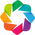

In [44]:
import holoviews as hv
hv.extension("bokeh")

In [45]:
hv.(wl, "obs_date", "rswl")

:Scatter   [obs_date]   (rswl)

<IPython.core.display.Javascript object>


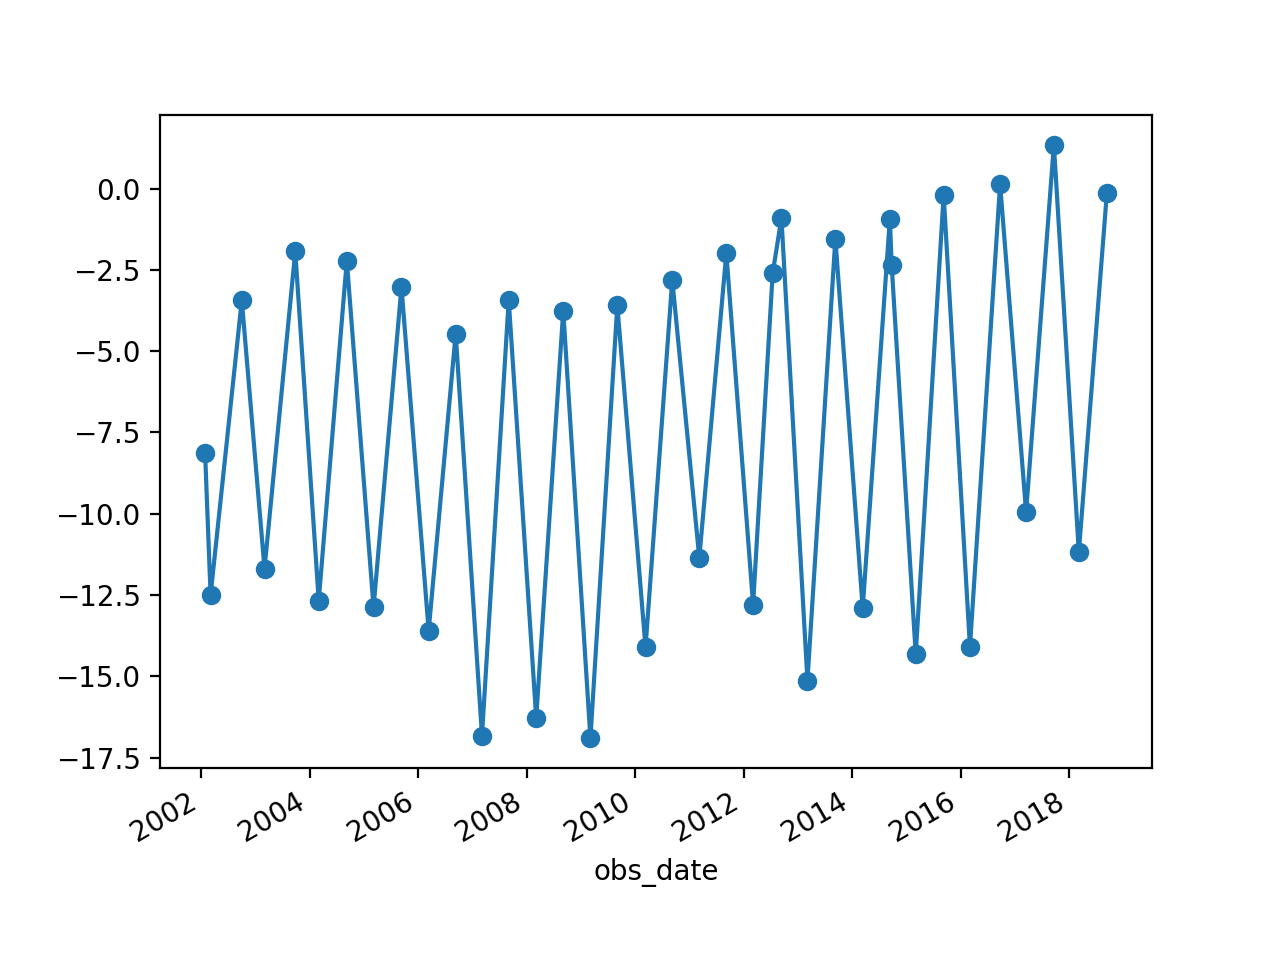

In [9]:
wl = wl.set_index(pd.to_datetime(wl.obs_date))
wl = wl.sort_index()
wl.rswl.plot(marker="o")